In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
td=pd.read_csv('mini-project-1/datasets/train/train_emoticon.csv')
vd=pd.read_csv('mini-project-1/datasets/valid/valid_emoticon.csv')
Xt=td['input_emoticon']
y=td.label
yv=vd.label
Xv=vd['input_emoticon']

In [2]:
stri=''
for i in Xt:
    for j in range(13):
        if i[j] not in stri:
            stri+=i[j]
len(stri)

214

In [3]:
import pandas as pd
import numpy as np
# Extracting unique emojis
unique_emojis = set()
for i in Xt:
    unique_emojis.update(list(i))  # Collect all emojis from every string

unique_emojis = list(unique_emojis)

# Creating emoji-to-index dictionary
emoind = {emoji: idx for idx, emoji in enumerate(unique_emojis)}

# One-hot encoding function for a single emoji
def ohee(emoji):
    ohv = np.zeros(len(unique_emojis), dtype=int)
    if emoji in emoind:
        index = emoind[emoji]
        ohv[index] = 1
    return ohv

# Step 5: One-hot encoding function for a sequence of 13 emojis
def one_hot_encode_and_concatenate(emoji_sequence):
    concatenated_vector = np.zeros(13 * len(unique_emojis), dtype=int)  # 13 one-hot vectors concatenated
    for idx, emoji in enumerate(emoji_sequence[:13]):  # Limit to 13 emojis
        one_hot_vector = ohee(emoji)  # One-hot encode each emoji
        concatenated_vector[idx * len(unique_emojis):(idx + 1) * len(unique_emojis)] = one_hot_vector  # Concatenate
    return concatenated_vector

# Step 6: Apply one-hot encoding and concatenation to the entire dataset
one_hot_encoded_data = Xt.apply(one_hot_encode_and_concatenate)

# Convert the result into a 2D numpy array for training (batch_size x 13 * num_unique_emojis)
Xtf = np.stack(one_hot_encoded_data)

print(Xtf.shape)  # (num_samples, 13 * num_unique_emojis)

(7080, 2782)


In [4]:
# Step 6: Apply one-hot encoding to the entire dataset
one_hot_encoded_data2 = Xv.apply(one_hot_encode_and_concatenate)

# Convert the result into a 3D numpy array for training (batch_size x 13 x num_unique_emojis)
Xvf= np.stack(one_hot_encoded_data2)
# (num_samples, 13, num_unique_emojis)

In [5]:
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]

# Function to train LR and compute accuracy for each method
def evaluate_lr(train_feat_X_method, valid_feat_X_method, method_name):
    accuracies = []
    for percentage in percentages:
        n_samples = int(len(train_feat_X_method) * percentage)
        
        # Subset the training data
        x_train_subset = train_feat_X_method[:n_samples]
        y_train_subset = y[:n_samples]

        # Train the LR model
        LR_classifier = LogisticRegression(random_state=42)
        LR_classifier.fit(x_train_subset, y_train_subset)

        # Predict on the validation set
        y_pred = LR_classifier.predict(valid_feat_X_method)

        # Calculate accuracy
        accuracy = accuracy_score(yv, y_pred)
        accuracies.append(accuracy)
        print(f"Accuracy ({method_name}) with {int(percentage*100)}% training data: {accuracy:.2f}")
    
    return accuracies

In [6]:
accuracies_concat = evaluate_lr(Xtf, Xvf, "Concatenation")

Accuracy (Concatenation) with 20% training data: 0.76
Accuracy (Concatenation) with 40% training data: 0.81
Accuracy (Concatenation) with 60% training data: 0.84
Accuracy (Concatenation) with 80% training data: 0.87
Accuracy (Concatenation) with 100% training data: 0.89


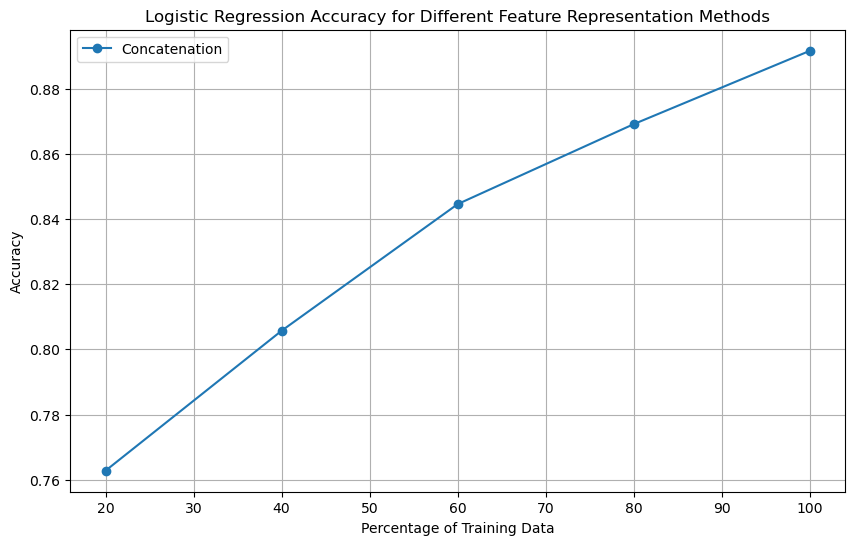

In [7]:
plt.figure(figsize=(10, 6))
plt.plot([p * 100 for p in percentages], accuracies_concat, label="Concatenation", marker='o')

plt.xlabel("Percentage of Training Data")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy for Different Feature Representation Methods")
plt.legend()
plt.grid(True)
plt.show()